In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [117]:
df = pd.read_csv('dataset/sales_data.csv')

In [118]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index(df.columns[0], inplace = True)

<Axes: xlabel='Month', ylabel='Sales'>

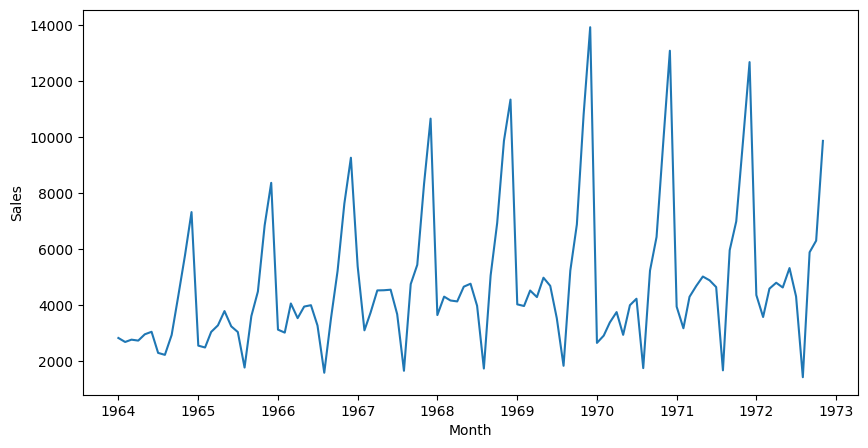

In [119]:
plt.figure(figsize = (10,5))
sns.lineplot(data = df, x = df.index, y = df.Sales)

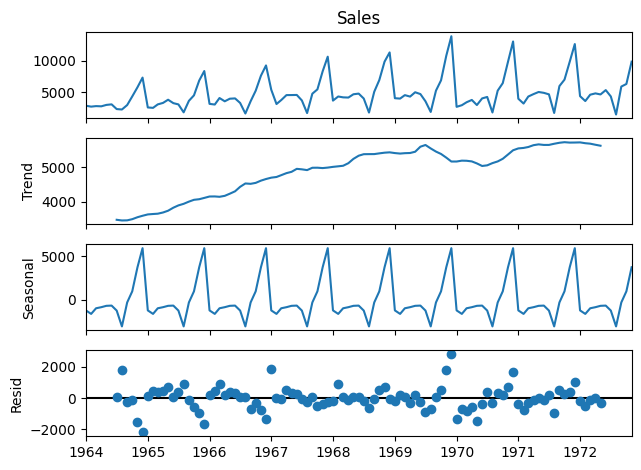

In [120]:
seasonal_data = seasonal_decompose(df['Sales'])
seasonal_data.plot();

In [121]:
train_size = len(df) - 12

In [122]:
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [123]:
scaler = MinMaxScaler()
scaler.fit(train, test)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [124]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [125]:
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.10062384 0.08903832 0.09576278]
Predict this y: 
 [[0.09300818]]


In [126]:
X.shape

(1, 3, 1)

In [127]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [128]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [129]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\prosa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [130]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
model.fit(generator, epochs = 50)

Epoch 1/50
41/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0410

C:\Users\prosa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0473
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0385
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0443
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0327
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0219
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0365
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169
Epoch 10/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180
Epoch 11/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113
Epoch 12/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081
Epoch 13/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100
Epoch 14/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080
Epoch 15/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064
Epoch 16/50
83/83 ━━━━━━━━━━━━

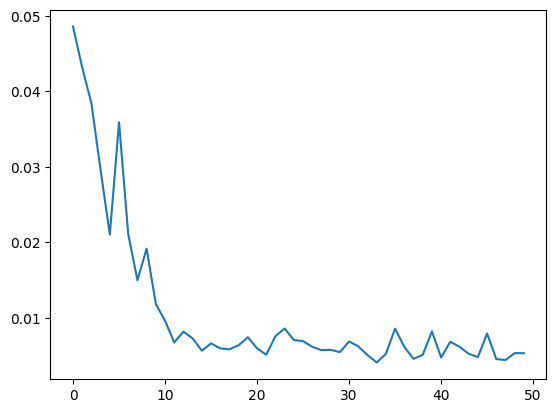

In [132]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [133]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


array([[0.8640711]], dtype=float32)

In [134]:
scaled_test[0]

array([0.89905209])

In [135]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) 



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [136]:
test_predictions

[array([0.8640711], dtype=float32),
 array([0.24825835], dtype=float32),
 array([0.19599277], dtype=float32),
 array([0.2561675], dtype=float32),
 array([0.28385332], dtype=float32),
 array([0.3102646], dtype=float32),
 array([0.30368963], dtype=float32),
 array([0.2900553], dtype=float32),
 array([0.08809326], dtype=float32),
 array([0.3962662], dtype=float32),
 array([0.48488423], dtype=float32),
 array([0.67918766], dtype=float32)]

In [141]:
true_predictions = scaler.inverse_transform(test_predictions)
test.loc[:,'Predictions'] = true_predictions

In [142]:
test.head()

,Sales,Predictions
Month,,
1971-12-01,12670,12238.229231
1972-01-01,4348,4637.252842
1972-02-01,3564,3992.138733
1972-03-01,4577,4734.875467
1972-04-01,4788,5076.601557


<Axes: xlabel='Month'>

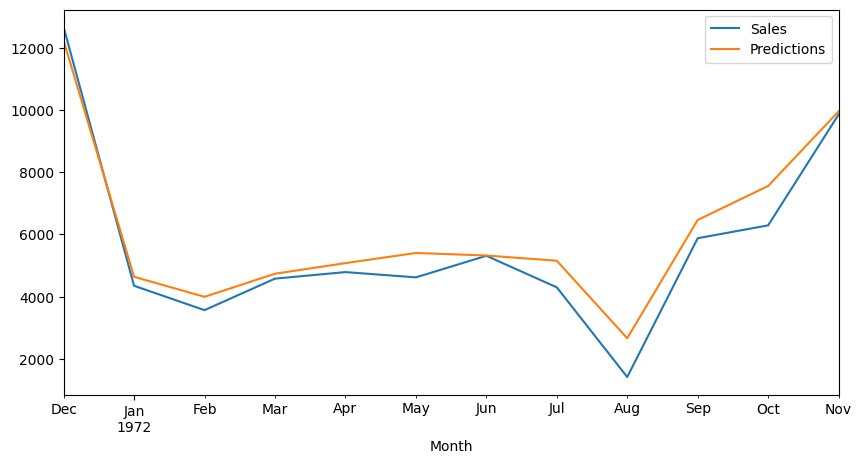

In [143]:
test.plot(figsize = (10, 5))

In [144]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['Sales'], test['Predictions']))
print(rmse)

672.3261125387313
